In [37]:
import base64
import string
import numpy as np

alphabet = string.ascii_lowercase
english_probs = {"a":8.55,"b":1.6,"c":3.16,"d":3.87,"e":12.1,"f":2.18,"g":2.09,"h":4.96,"i":7.33,"j":0.22,"k":0.81,"l":4.21,"m":2.53,"n":7.17,"o":7.47,"p":2.07,"q":0.1,"r":6.33,"s":6.73,"t":8.94,"u":2.68,"v":1.06,"w":1.86,"x":0.19,"y":1.72,"z":0.11}
base64_ciphertext = "KxRIRjMSEgMUFQkIRhIOA0YKBxEfAxRGEQcVRgdGCwcIRgkARgdGFBMBAQMCRgUJEwgSAwgHCAUDRhIOBxJGEQcVRggDEAMURgoPAQ4SAwJGBB9GB0YVCw8KA11GBQkKAkpGFQUHCBIfRgcIAkYDCwQHFBQHFRUDAkYPCEYCDxUFCRMUFQNdRgQHBQ0RBxQCRg8IRhUDCBIPCwMIEl1GCgMHCEpGCgkIAUpGAhMVEh9KRgIUAwcUH0YHCAJGHwMSRhUJCwMOCRFGCgkQBwQKA0g="

'''
    Gets the probs of each english letter on each "plain text"
'''
def get_text_probs(value):
    result = {}
    l = len(value.lower().strip())
    for i in alphabet:
      if i in value:
        result[i] = value.count(i)/l 
      else:
        result[i] = 0
    return result
    
'''
    Statistical distance formula
    sd = 1/2 * sum(|pr(x) - pr(y)|)
'''
def statistical_distance(text_prob):
    result = 0.0
    for i in alphabet:
      result += abs(english_probs[i]-text_prob[i])
    return 1/2*result

'''
    XOR function
'''
def to_bytes(var, key):
    a = np.frombuffer(var, dtype = np.uint8)
    b = np.frombuffer(key, dtype = np.uint8)
    return (a^b).tobytes()

'''
    Get the stadistical distance and text of each number 
    from 0 to 255 into a dictionary
'''    
def keys_distance(ct):
  distances = {}
  for i in range(0,256):
    xorted_ct = to_bytes(ct, i.to_bytes(1, 'little'))
    plaintext = xorted_ct.decode('UTF-8', errors='ignore')
    text_prob = get_text_probs(plaintext)
    distances[i] = [statistical_distance(text_prob), plaintext]
  return distances

'''
    Gets the miniumun stadistical distance of all previously calculated
'''    
def min_distance(keys_distances):
  return min(keys_distances, key=keys_distances.get)

def show_result_1():
  ct_decoded = base64.b64decode(base64_ciphertext)
  print(ct_decoded)
  kd = keys_distance(ct_decoded)
  print(kd)
  key = min_distance(kd)
  print(kd[key])
  print("The recovered plaintext: ", kd[key][1])
  print("The decryption key: ", key)

show_result_1()


b'+\x14HF3\x12\x12\x03\x14\x15\t\x08F\x12\x0e\x03F\n\x07\x11\x1f\x03\x14F\x11\x07\x15F\x07F\x0b\x07\x08F\t\x00F\x07F\x14\x13\x01\x01\x03\x02F\x05\t\x13\x08\x12\x03\x08\x07\x08\x05\x03F\x12\x0e\x07\x12F\x11\x07\x15F\x08\x03\x10\x03\x14F\n\x0f\x01\x0e\x12\x03\x02F\x04\x1fF\x07F\x15\x0b\x0f\n\x03]F\x05\t\n\x02JF\x15\x05\x07\x08\x12\x1fF\x07\x08\x02F\x03\x0b\x04\x07\x14\x14\x07\x15\x15\x03\x02F\x0f\x08F\x02\x0f\x15\x05\t\x13\x14\x15\x03]F\x04\x07\x05\r\x11\x07\x14\x02F\x0f\x08F\x15\x03\x08\x12\x0f\x0b\x03\x08\x12]F\n\x03\x07\x08JF\n\t\x08\x01JF\x02\x13\x15\x12\x1fJF\x02\x14\x03\x07\x14\x1fF\x07\x08\x02F\x1f\x03\x12F\x15\t\x0b\x03\x0e\t\x11F\n\t\x10\x07\x04\n\x03H'
{0: [50.019999999999996, '+\x14HF3\x12\x12\x03\x14\x15\t\x08F\x12\x0e\x03F\n\x07\x11\x1f\x03\x14F\x11\x07\x15F\x07F\x0b\x07\x08F\t\x00F\x07F\x14\x13\x01\x01\x03\x02F\x05\t\x13\x08\x12\x03\x08\x07\x08\x05\x03F\x12\x0e\x07\x12F\x11\x07\x15F\x08\x03\x10\x03\x14F\n\x0f\x01\x0e\x12\x03\x02F\x04\x1fF\x07F\x15\x0b\x0f\n\x03]F\x05\t\n\x0

Possible Top 3 Key Lengths: [4, 3, 2]


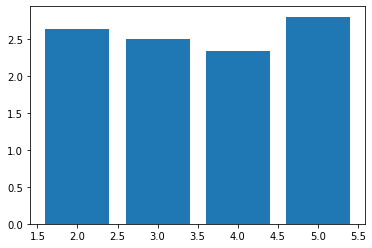

In [46]:
import base64
import operator
from heapq import nsmallest
import matplotlib.pyplot as plt

def hamming_distance(a, b):
  hd = 0
  for b1,b2 in zip(a,b):
    hd += bin(b1^b2).count('1')
  return hd

def split_text(text, n):
  return [text[i:i + n] for i in range(0, len(text), n)]

def split_bytes(data, n):
  ct_decoded = base64.b64decode(data)
  chunks = split_text(ct_decoded, n)
  if len(chunks[0]) != len(chunks[-1]):
    chunks.pop()
  return chunks

def most_likely_key_length(text):
  hd_scores_map = {}
  textSize = len(base64.b64decode(text))
  for keySize in range (2,textSize//2):
    distances = []
    chunks = split_bytes(text,keySize)
    for a in chunks:
      for b in chunks:
        hd_normalized = hamming_distance(a,b) / keySize
        if hd_normalized > 0:
          distances.append(hd_normalized)
    if len(distances) > 0:
      score = sum(distances) / len(distances)
      hd_scores_map[keySize] = score
      
  return hd_scores_map

def most_top_n(scores_map, n):
  return nsmallest(n, scores_map, key=scores_map.get)

def show_result_2(text, top_n):
  scores_map = most_likely_key_length(text)
  possible_keys_length = most_top_n(scores_map, top_n)
  print(f'Possible Top 3 Key Lengths: {possible_keys_length}')
  #[print(f'Key: {k} - Score: {s}') for k,s in possible_keys_length.items()]
  plt.bar(*zip(*scores_map.items()))
  plt.show()

show_result_2("EggTAwQZHRQSHhEWBA==", top_n=3)

ciphertext_2 = "EjxYTxMKdwYaSBwcGTwfCBxHOwsGLRYdGwsBZSw8GhsaCncIEwdDVQM6AQ1OEzwJEWwJFRoBUjIgIFQOFRg+B1QLHRoEJRoHCUchGEUlC1QzBBY2IypTHFIUPgcQRE8XBjoGDgYTdAcQOEUVVAMeKi43VAAUWTsIGgwDGgYxAEkZDiAARToEFxULBmUtPAAcXlk2BRhIAxobPhoHCUcyBxc7BAYQRQYqYTcdHAIWJAAaD08aEnUSSQoSORhFOwoGAA1SMTY8VAsdFTsIBhtPFBoxUwhODzUEA2BFEhsXUiMoNQAWUg0/BgEbDhsQe1MnARB0CQtsBB0GFR03NXMZGgENdwYXCxoFDXUSSRgGJxxFIAoAVAoUZS0yGgteWSQGVAsOGxo6B0kdEzUGAWwXHRMNBmUoPVQOUjo+HQ1PHFUHPRwZHg46D0UoDAcAFxsmNWhUDQcNdw8dBg4ZGCxTCE4FPQ9FOBcVFxFSMiAgVA0dDDABAERPFBoxUxsHADwcRSULVBYEES5hPBJPBhA5EFQlDgcdNB1OHUc2CQYnRQ0VFxZkYRoaHAYYOR0YEUNVNzwHEE4vNQQJbBIVB0UUMC0/VAAUWTYZBAQGFhU7BxpOATsaRSoJDR0LFWUDIRUBBhY5STwBAxkHclMPBxUnHEUtDAYXFxMjNX1UOx1ZEAgQGw0MUyZTAwEeeEgEIQoaExYGZTU7FRtSGyIHFwBPAhUmUyEPFTsEAWwxHBsIAjYuPVhPExd3BhgMTzoGMhIHBx01HAwjC1QYBBZpYSQcAFIONhpUAwEaAztTCBwIIQYBbBEbAwtSJDJzFU8RETYZVB8HGlQ2HBwCA3QMCmwEFhsQBmUgPQ0bGhA5DlQLDhkYPB0OTgE7GkUuFxUdCwFrYRIHTxMXdwgdGh8aBiFTAB1HOgcRbAkVHQFSKjQnVAYcWTZJEAkWWVQdEhsBCzBIAiMRVBYQATxhJB0bGlknCB0MTxQCPBIdARUnSAQiAVQHCh0rYSQVHFIJPgUbHAYbE3USSQ0VNQ4RbBIdAA0dMDVzFQYWQncIGgxPGxshUwYACy1IJz4EGgAKHGUJOhgDAVkxBhgDHFlUNwYdTgg4DEUtEx0VER03Mn9UHBMOdwAaSCcUBjofDUJHNUhHLgwGEEgfJC9xVAAUWTkGVBsCFBg5UwgMDjgBETVLVDULFmUyPFQbGxcuSTkJHRwVO1QaTkUiARYlChpWRQUkMnMVTxQYNB1PSAUAByFTCB1HdgoMK0UTHRceZ2EfAQwLXiRJLgcATlQ0HQ1CRzUbRTsMABxFEyktcxYGFVkUAAARTxQSMxIAHBR4SAQiRT0aBAciNCEVGxsWOUkHAAAAGDFTGhoGJhxFJRFUGwMUa2EdGxheWTgHVAkDGVQmBgoGRzUOAy0MBgdFCyo0cxUDBRguGlQOBhsQdRJJTBE9Gww4CgZUChRlKTwaAABbbEkVBgtVGztTHQYOJ0gCPgQaEEUWJDhzMw4WCjUQVAsAABgxHU4aRyAADCIOVBsDUiQvKhYAFgB3DxsaTwEcNAdJBwokBxc4BBoARQIqMidUDQcNdyQVGgYUGntTKAADeEgEP0UdAEUFKjQ/EE8dGjQcBkgGG1QUBg4bFCBERS0LDVQBEzxhJBsaHh13DRtETxQHdQcBDxN0ARZsBFQHBhoqLj9UGRMaNh0dBwFVGTodHQZJ"




In [ ]:
import textwrap
from statistics import mode

base64_ciphertext_2 = "EjxYTxMKdwYaSBwcGTwfCBxHOwsGLRYdGwsBZSw8GhsaCncIEwdDVQM6AQ1OEzwJEWwJFRoBUjIgIFQOFRg+B1QLHRoEJRoHCUchGEUlC1QzBBY2IypTHFIUPgcQRE8XBjoGDgYTdAcQOEUVVAMeKi43VAAUWTsIGgwDGgYxAEkZDiAARToEFxULBmUtPAAcXlk2BRhIAxobPhoHCUcyBxc7BAYQRQYqYTcdHAIWJAAaD08aEnUSSQoSORhFOwoGAA1SMTY8VAsdFTsIBhtPFBoxUwhODzUEA2BFEhsXUiMoNQAWUg0/BgEbDhsQe1MnARB0CQtsBB0GFR03NXMZGgENdwYXCxoFDXUSSRgGJxxFIAoAVAoUZS0yGgteWSQGVAsOGxo6B0kdEzUGAWwXHRMNBmUoPVQOUjo+HQ1PHFUHPRwZHg46D0UoDAcAFxsmNWhUDQcNdw8dBg4ZGCxTCE4FPQ9FOBcVFxFSMiAgVA0dDDABAERPFBoxUxsHADwcRSULVBYEES5hPBJPBhA5EFQlDgcdNB1OHUc2CQYnRQ0VFxZkYRoaHAYYOR0YEUNVNzwHEE4vNQQJbBIVB0UUMC0/VAAUWTYZBAQGFhU7BxpOATsaRSoJDR0LFWUDIRUBBhY5STwBAxkHclMPBxUnHEUtDAYXFxMjNX1UOx1ZEAgQGw0MUyZTAwEeeEgEIQoaExYGZTU7FRtSGyIHFwBPAhUmUyEPFTsEAWwxHBsIAjYuPVhPExd3BhgMTzoGMhIHBx01HAwjC1QYBBZpYSQcAFIONhpUAwEaAztTCBwIIQYBbBEbAwtSJDJzFU8RETYZVB8HGlQ2HBwCA3QMCmwEFhsQBmUgPQ0bGhA5DlQLDhkYPB0OTgE7GkUuFxUdCwFrYRIHTxMXdwgdGh8aBiFTAB1HOgcRbAkVHQFSKjQnVAYcWTZJEAkWWVQdEhsBCzBIAiMRVBYQATxhJB0bGlknCB0MTxQCPBIdARUnSAQiAVQHCh0rYSQVHFIJPgUbHAYbE3USSQ0VNQ4RbBIdAA0dMDVzFQYWQncIGgxPGxshUwYACy1IJz4EGgAKHGUJOhgDAVkxBhgDHFlUNwYdTgg4DEUtEx0VER03Mn9UHBMOdwAaSCcUBjofDUJHNUhHLgwGEEgfJC9xVAAUWTkGVBsCFBg5UwgMDjgBETVLVDULFmUyPFQbGxcuSTkJHRwVO1QaTkUiARYlChpWRQUkMnMVTxQYNB1PSAUAByFTCB1HdgoMK0UTHRceZ2EfAQwLXiRJLgcATlQ0HQ1CRzUbRTsMABxFEyktcxYGFVkUAAARTxQSMxIAHBR4SAQiRT0aBAciNCEVGxsWOUkHAAAAGDFTGhoGJhxFJRFUGwMUa2EdGxheWTgHVAkDGVQmBgoGRzUOAy0MBgdFCyo0cxUDBRguGlQOBhsQdRJJTBE9Gww4CgZUChRlKTwaAABbbEkVBgtVGztTHQYOJ0gCPgQaEEUWJDhzMw4WCjUQVAsAABgxHU4aRyAADCIOVBsDUiQvKhYAFgB3DxsaTwEcNAdJBwokBxc4BBoARQIqMidUDQcNdyQVGgYUGntTKAADeEgEP0UdAEUFKjQ/EE8dGjQcBkgGG1QUBg4bFCBERS0LDVQBEzxhJBsaHh13DRtETxQHdQcBDxN0ARZsBFQHBhoqLj9UGRMaNh0dBwFVGTodHQZJ"

# something important to determine here is that vigenere is obsolete
# soyqihizs xmpadianf fd defqgmizq werq uh thmf kigqztre ue dbsaxtte
# key: aammp

text_example = "c295cWloaXpzIHhtcGFkaWFuZiBmZCBkZWZxZ21penEgd2VycSB1aCB0aG1mIGtpZ3F6dHJlIHVlIGRic2F4dHRl"

'''
    2.a
'''
def split_bytes(data, n):
  print(f'N is: {n} //data is: {data} ')
  info = [data[i:i + n] for i in range(0, len(data), n)]
  print("INFO: ", info)
  return info

'''
    2.b
'''
def hamming_distance(a, b):
  if len(a) != len(b):
    if len(a) < len(b):
      a += b[len(a):]
    else:      
      b += a[len(b):]
  hd = bin(int.from_bytes(a, "little")^int.from_bytes(b, "little")).count('1')
  return hd

def hammingDist(b1, b2):
  diff=0
  for i in range(min(len(b1),len(b2))):
      if(b1[i]^b2[i]!=0):
          diff+=1
  return(diff)

def chunks_hamming_distance(split_bytes):
  hamming_distance_map = {}
  for i in split_bytes:
    for j in split_bytes:      
      if split_bytes.index(i) not in hamming_distance_map.keys():
        hamming_distance_map[split_bytes.index(i)] = hamming_distance(i, j) #hammingDist(i, j) #
      else:
        hamming_distance_map[split_bytes.index(i)] += hamming_distance(i, j) # hammingDist(i, j) #
  hamming_distance_map.popitem()
  return hamming_distance_map

def hd_test(b, sbytes):
  hd_map = {}
  for i in sbytes:    
    #print(f'B is : {b} and sbytes is : {i}')
    if b == i:
      continue

    #print(f'B {b} hd with: {i} is: {hamming_distance(i, b)}')
    if sbytes.index(i) not in hd_map.keys():
      hd_map[sbytes.index(i)] = hamming_distance(i, b) #hammingDist(i, j) #
    else:
      hd_map[sbytes.index(i)] += hamming_distance(i, b) # hammingDist(i, j) #
  print(hd_map)    
  hd_map.popitem()
  return hd_map

def split(array, parts):
    k, m = divmod(len(array), parts)
    result = []
    for i in range(parts):
      result.append(array[i*k+min(i, m):(i+1)*k+min(i+1, m)])
    return result

def yields_the_lowest(encoded, n=5):
  lowest_hd_map = {}
  #for i in range(8,200): #for i in range(1, len(encoded)//2):  
  sbytes = split_bytes(encoded, n)
  #print("S Bytes: ", sbytes)
  pos = 0
  for b in sbytes:
    if len(b) < n:
      continue

    #print("byte array: ", b)
    result = hd_test(b, sbytes) #result = chunks_hamming_distance(b)
    #print("HD result: ", result)
    min = min_distance(result)
    #print("MIN distance: ", min)
    lowest_hd_map[pos] = result[min]
    pos += 1

  print("LOWEST HD MAP: ", lowest_hd_map)
  return lowest_hd_map

def show_result_2():
  #encoded = base64.b64decode(base64_ciphertext_2)
  encoded2 = base64.b64decode(text_example).replace(b' ', b'')
  lowest_hd = yields_the_lowest(encoded2)
  key = min_distance(lowest_hd)
  print("lowest key: ", key)

  splitted = list(filter(lambda p : len(p) >= 5, split_bytes(encoded2, 5)))
  print("SPLITTED: ", splitted)
  for i in range(0, len(splitted[1]), 1):
    print("SPLITTED SUB i: ", splitted[i])
    kd1 = keys_distance(splitted[i])
    print("kd 1: ", kd1)
    key2 = min_distance(kd1)
    print("key 2: ", key2)
    print("The recovered plaintext: ", kd1[key2][1])

show_result_2()




N is: 5 //data is: b'soyqihizsxmpadianffddefqgmizqwerquhthmfkigqztreuedbsaxtte' 
INFO:  [b'soyqi', b'hizsx', b'mpadi', b'anffd', b'defqg', b'mizqw', b'erquh', b'thmfk', b'igqzt', b'reued', b'bsaxt', b'te']
{1: 11, 2: 14, 3: 15, 4: 14, 5: 12, 6: 10, 7: 13, 8: 12, 9: 10, 10: 13, 11: 5}
{0: 11, 2: 15, 3: 14, 4: 13, 5: 7, 6: 13, 7: 14, 8: 11, 9: 15, 10: 14, 11: 5}
{0: 14, 1: 15, 3: 13, 4: 14, 5: 14, 6: 6, 7: 9, 8: 14, 9: 14, 10: 13, 11: 6}
{0: 15, 1: 14, 2: 13, 4: 11, 5: 15, 6: 13, 7: 12, 8: 11, 9: 11, 10: 14, 11: 6}
{0: 14, 1: 13, 2: 14, 3: 11, 5: 8, 6: 14, 7: 13, 8: 14, 9: 10, 10: 13, 11: 1}
{0: 12, 1: 7, 2: 14, 3: 15, 4: 8, 6: 14, 7: 15, 8: 12, 9: 16, 10: 15, 11: 5}
{0: 10, 1: 13, 2: 6, 3: 13, 4: 14, 5: 14, 7: 13, 8: 12, 9: 12, 10: 11, 11: 6}
{0: 13, 1: 14, 2: 9, 3: 12, 4: 13, 5: 15, 6: 13, 8: 19, 9: 13, 10: 18, 11: 3}
{0: 12, 1: 11, 2: 14, 3: 11, 4: 14, 5: 12, 6: 12, 7: 19, 9: 12, 10: 7, 11: 5}
{0: 10, 1: 15, 2: 14, 3: 11, 4: 10, 5: 16, 6: 12, 7: 13, 8: 12, 10: 11, 11: 2}
{0: 13, 1: 14